In [44]:
import tensorflow as tf
import numpy as np

In [45]:
import cv2
import imghdr

In [46]:
data_dir = 'data'

In [47]:
image_exts=['jpeg' , 'jpg' , 'bmp' , 'png']

In [48]:
image_exts[2]

'bmp'

In [49]:
import os

In [50]:

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue  # Skip if it's not a directory
    
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        try:
            # Check if the image has a valid extension
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))
            print(e)

Image not in exts list data\Happy\businesswoman-giving-high-five-male-260nw-2226244055.jpg
Image not in exts list data\Happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in exts list data\Happy\guilherme-stecanella-375176-unsplash.jpg
Image not in exts list data\Happy\Happy20People.jpg
Image not in exts list data\Happy\smiling-woman_W6GFOSFAXA.jpg
Image not in exts list data\Happy\traitshappypeople.jpg
Image not in exts list data\Sad\1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in exts list data\Sad\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in exts list data\Sad\depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg
Image not in exts list data\Sad\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in exts list data\Sad\depressed-senior-man-looking-unhappy-260nw-1326693131.jpg
Image not in exts list data\Sad\portrait-sad-man-60

In [51]:
import matplotlib.pyplot as plt


In [52]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 303 files belonging to 2 classes.


In [53]:
data_iterator = data.as_numpy_iterator()

In [54]:
batch = data_iterator.next()

In [55]:
len(batch)

2

In [56]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#preprocessing

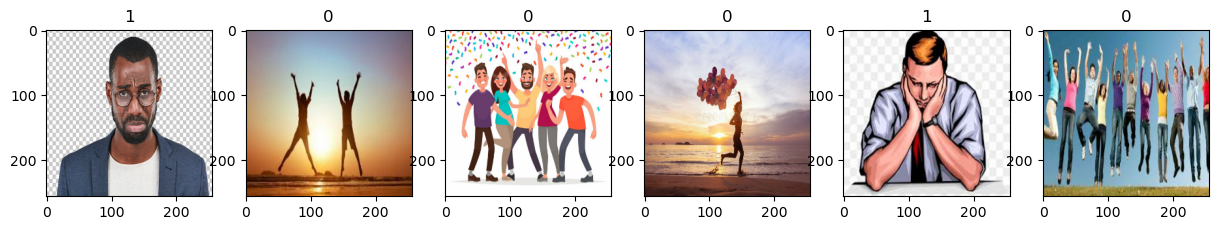

In [131]:
fig, ax =plt.subplots(ncols=6, figsize=(15,15))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [134]:
scaled = data.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [135]:
batch[0].max()


255.0

Splitting Data!

In [66]:
len(data)

10

In [194]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [169]:
train_size

7

In [195]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [196]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [237]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [238]:
model = Sequential()

In [239]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [240]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [241]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [242]:
logdir='logs'

In [243]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
## History Tracker for the model

In [244]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 460ms/step - accuracy: 0.4650 - loss: 430.0633 - val_accuracy: 0.7188 - val_loss: 5.4543
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 395ms/step - accuracy: 0.6571 - loss: 3.2184 - val_accuracy: 0.7188 - val_loss: 0.7935
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 405ms/step - accuracy: 0.8187 - loss: 0.8750 - val_accuracy: 0.7812 - val_loss: 0.3965
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/step - accuracy: 0.9070 - loss: 0.2493 - val_accuracy: 0.9375 - val_loss: 0.1722
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 430ms/step - accuracy: 0.9518 - loss: 0.1633 - val_accuracy: 1.0000 - val_loss: 0.0882
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.9809 - loss: 0.1049 - val_accuracy: 1.0000 - val_loss: 0.0604
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.9865 - loss: 0.0508 - val_accuracy: 1.0000 - val_loss: 0.0763
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - accuracy: 0.9887 - loss: 0.0409 - val_accuracy: 1.0000 - val_los

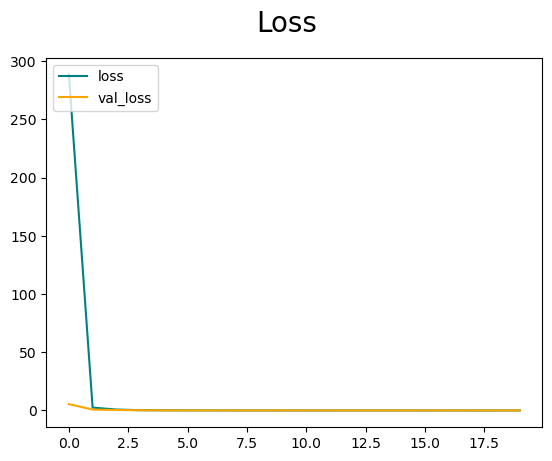

In [245]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

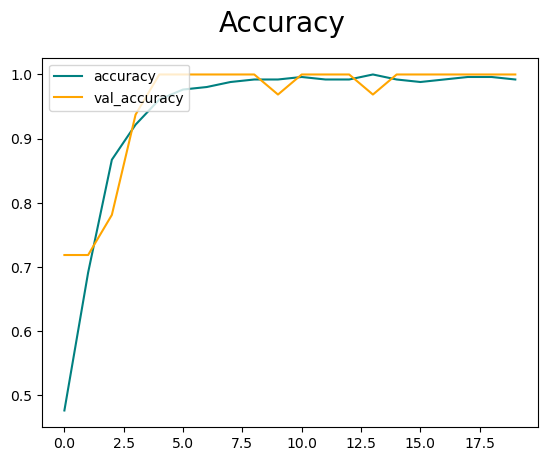

In [246]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [247]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [248]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [249]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


In [250]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


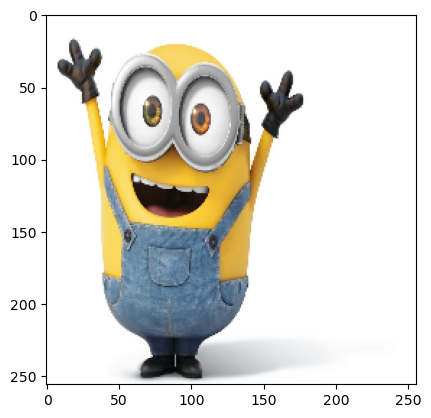

In [259]:


# Read the image
img = cv2.imread('Happy_Person.jpg')

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert image to tensor
img_tensor = tf.convert_to_tensor(img_rgb, dtype=tf.float32)

# Resize the image using TensorFlow
resize = tf.image.resize(img_tensor, (256, 256))

# Convert resized image back to NumPy array
resize_numpy = resize.numpy().astype(int)

# Display the resized image
plt.imshow(resize_numpy)
plt.axis()  # Optional: Turn off axis
plt.show()


In [260]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [261]:
yhat

array([[0.5117786]], dtype=float32)

In [258]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [90]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','happysad.h5'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')
new_model = load_model(os.path.join('models' , 'happysad.h5'))
new_model.predict(np.expand_dims(resize/255, 0))